In [69]:
import opendatasets as od
#"Importing the 'opendatasets' library for accessing various datasets from online repositories, facilitating seamless data retrieval and analysis."

In [70]:
data="https://www.kaggle.com/datasets/guillemservera/tsla-stock-data"
#give the link of dataset from kaggle

In [71]:
od.download(data)
#"Downloading the dataset specified by the variable 'data' using the 'download' function from the 'opendatasets' library, enabling easy access to the data for subsequent analysis."

Skipping, found downloaded files in ".\tsla-stock-data" (use force=True to force download)


In [72]:
import os
#"Importing the 'os' module to provide a way of interacting with the operating system, enabling tasks such as navigating file directories and managing files within the Python environment."

In [73]:
data_dir=r'.\tsla-stock-data'
#"Defining the directory path 'ecg-dataset' relative to the current working directory, which will serve as the location for storing the downloaded ECG dataset for further analysis."

In [74]:
os.listdir(data_dir)
#"Listing the contents of the directory 'ecg-dataset' using the 'listdir' function from the 'os' module, allowing exploration of the files and folders within the specified directory."

['tsla_raw_data.csv', 'tsla_split_adjusted.csv']

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as smi
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN,GRU
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tensorflow.keras.optimizers import Adam
import warnings
warnings.simplefilter('ignore')

In [76]:
# Load the data into Pandas DataFrame
tsla_raw_data = pd.read_csv(os.path.join(data_dir, 'tsla_raw_data.csv'))
tsla_split_adjusted = pd.read_csv(os.path.join(data_dir, 'tsla_split_adjusted.csv'))

# Display the first few rows of each DataFrame to understand the structure of the data
print("First few rows of tsla_raw_data:")
print(tsla_raw_data.head())

print("\nFirst few rows of tsla_split_adjusted:")
print(tsla_split_adjusted.head())


First few rows of tsla_raw_data:
         date     open     high      low    close    volume  adjusted_close  \
0  2010-06-29  18.9999  24.9999  17.5401  23.8899  18783278          1.5927   
1  2010-06-30  25.7901  30.4191  23.3001  23.8299  17194392          1.5887   
2  2010-07-01  24.9999  25.9200  20.2701  21.9600   8229862          1.4640   
3  2010-07-02  23.0001  23.1000  18.7101  19.2000   5141806          1.2800   
4  2010-07-06  20.0001  20.0001  15.8301  16.1100   6879295          1.0740   

   change_percent  avg_vol_20d  
0             NaN          NaN  
1           -0.25          NaN  
2           -7.85          NaN  
3          -12.57          NaN  
4          -16.09          NaN  

First few rows of tsla_split_adjusted:
         date     open     high      low    close     volume  raw_close  \
0  2010-06-29  1.26666  1.66666  1.16934  1.59266  281749173    23.8899   
1  2010-06-30  1.71934  2.02794  1.55334  1.58866  257915884    23.8299   
2  2010-07-01  1.66666  1.728

In [77]:
tsla_split_adjusted.shape

(3465, 9)

In [78]:
tsla_split_adjusted.mean()

open              7.281299e+01
high              7.443515e+01
low               7.109958e+01
close             7.278835e+01
volume            9.699166e+07
raw_close         3.060134e+02
change_percent    1.987038e-01
avg_vol_20d       9.696373e+07
dtype: float64

In [79]:
tsla_split_adjusted.median()

open              1.716600e+01
high              1.745734e+01
low               1.685534e+01
close             1.713400e+01
volume            8.214249e+07
raw_close         2.332701e+02
change_percent    1.200000e-01
avg_vol_20d       8.961985e+07
dtype: float64

In [80]:
tsla_split_adjusted.mode()

,date,open,high,low,close,volume,raw_close,change_percent,avg_vol_20d
0,2010-06-29,1.86666,1.86666,1.86666,1.828,19673219.0,27.42,-0.43,4317138.75
1,2010-06-30,2.00000,2.00000,NaN,NaN,NaN,NaN,NaN,4324242.00
2,2010-07-01,NaN,2.30000,NaN,NaN,NaN,NaN,NaN,4362624.00
3,2010-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4465103.25
4,2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4703895.00
...,...,...,...,...,...,...,...,...,...
3460,2024-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3461,2024-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3462,2024-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3463,2024-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:

# descriptive statistics for tsla_split_adjusted
tsla_split_adjusted_stats = tsla_split_adjusted.describe()
print("\nDescriptive statistics for tsla_split_adjusted:")
print(tsla_split_adjusted_stats)



Descriptive statistics for tsla_split_adjusted:
              open         high          low        close        volume  \
count  3465.000000  3465.000000  3465.000000  3465.000000  3.465000e+03   
mean     72.812993    74.435150    71.099579    72.788345  9.699166e+07   
std     102.033931   104.347340    99.551304   101.950063  7.940514e+07   
min       1.076000     1.108660     0.998660     1.053340  1.779210e+06   
25%      11.094000    11.390000    10.833340    11.105340  4.666662e+07   
50%      17.166000    17.457340    16.855340    17.134000  8.214249e+07   
75%     138.816667   142.666667   135.690000   139.440000  1.230805e+08   
max     411.470000   414.496667   405.666667   409.970000  9.140814e+08   

         raw_close  change_percent   avg_vol_20d  
count  3465.000000     3464.000000  3.446000e+03  
mean    306.013389        0.198704  9.696373e+07  
std     289.493592        3.574324  6.337573e+07  
min      15.800100      -21.060000  4.317139e+06  
25%     152.460000  

<AxesSubplot:>

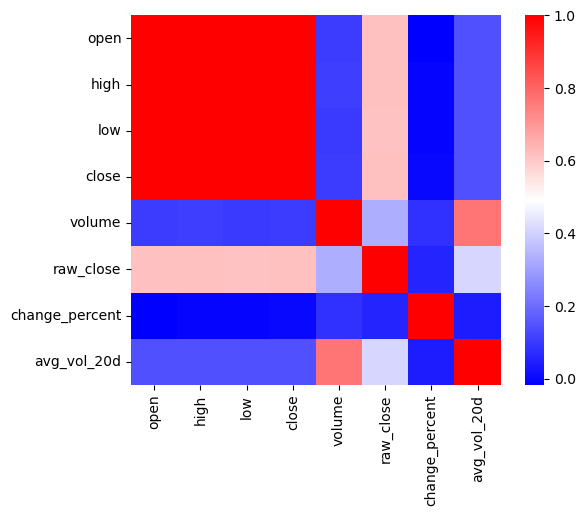

In [82]:
correlations = tsla_split_adjusted.corr()
sns.heatmap(data = correlations,square = True, cmap = "bwr")
# the heatmap shows the correlation between the columns the red colour shows max correlation and blue shows minimal correlation

In [83]:
# Check for null values in tsla_split_adjusted
split_adjusted_null_values = tsla_split_adjusted.isnull().sum()
print("\nNull values in tsla_split_adjusted:")
print(split_adjusted_null_values)


Null values in tsla_split_adjusted:
date               0
open               0
high               0
low                0
close              0
volume             0
raw_close          0
change_percent     1
avg_vol_20d       19
dtype: int64


In [84]:

# Define a function to perform imputation for a DataFrame
def impute_null_values(data):
    # Identify columns with null values
    columns_with_null = data.columns[data.isnull().any()]
    
    # Create a SimpleImputer object with strategy 'mean'
    imputer = SimpleImputer(strategy='mean')
    
    # Fit the imputer on the data
    imputer.fit(data[columns_with_null])
    
    # Transform and replace null values in the DataFrame
    data[columns_with_null] = imputer.transform(data[columns_with_null])
    
    return data

# Impute null values for tsla_raw_data
tsla_raw_data_imputed = impute_null_values(tsla_raw_data)

# Impute null values for tsla_split_adjusted
tsla_split_adjusted_imputed = impute_null_values(tsla_split_adjusted)

# Display the imputed DataFrames
print("Imputed tsla_raw_data:")
print(tsla_raw_data_imputed.isnull().sum())

print("\nImputed tsla_split_adjusted:")
print(tsla_split_adjusted_imputed.isnull().sum())


Imputed tsla_raw_data:
date              0
open              0
high              0
low               0
close             0
volume            0
adjusted_close    0
change_percent    0
avg_vol_20d       0
dtype: int64

Imputed tsla_split_adjusted:
date              0
open              0
high              0
low               0
close             0
volume            0
raw_close         0
change_percent    0
avg_vol_20d       0
dtype: int64


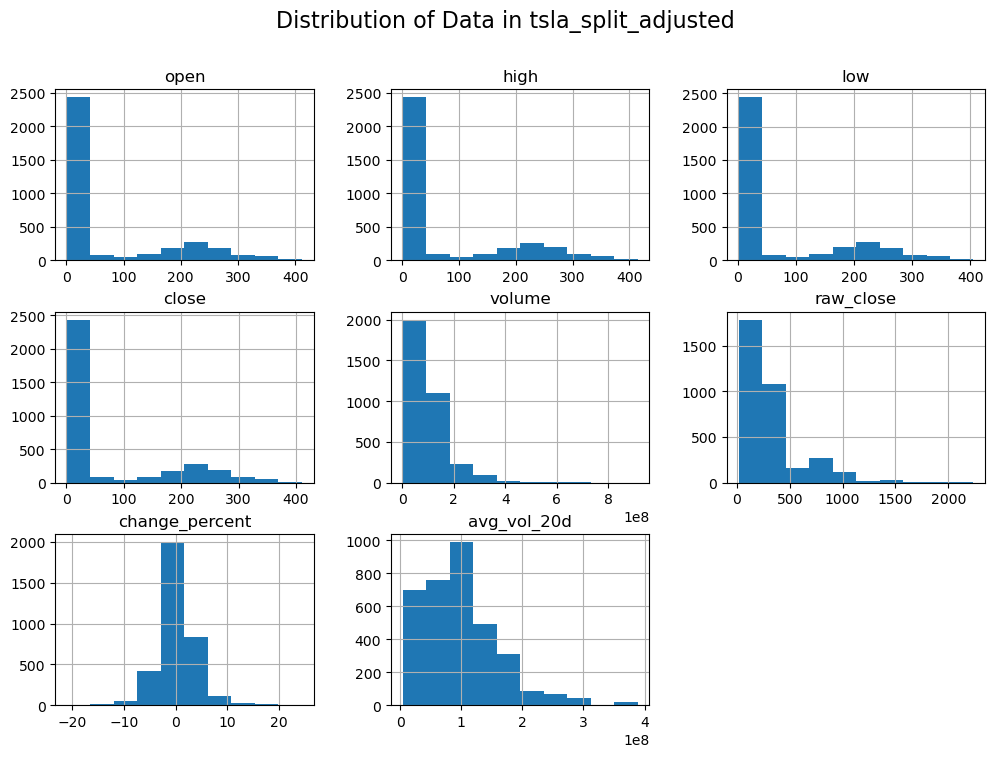

In [85]:
#This code will plot histograms for each numerical column in both datasets, allowing you to visualize the distribution of data
# Function to plot histograms for numerical columns
def plot_histograms(data, title):
    data.hist(figsize=(12, 8))
    plt.suptitle(title, fontsize=16)
    plt.show()

# Plot histograms for tsla_split_adjusted
plot_histograms(tsla_split_adjusted_imputed, "Distribution of Data in tsla_split_adjusted")


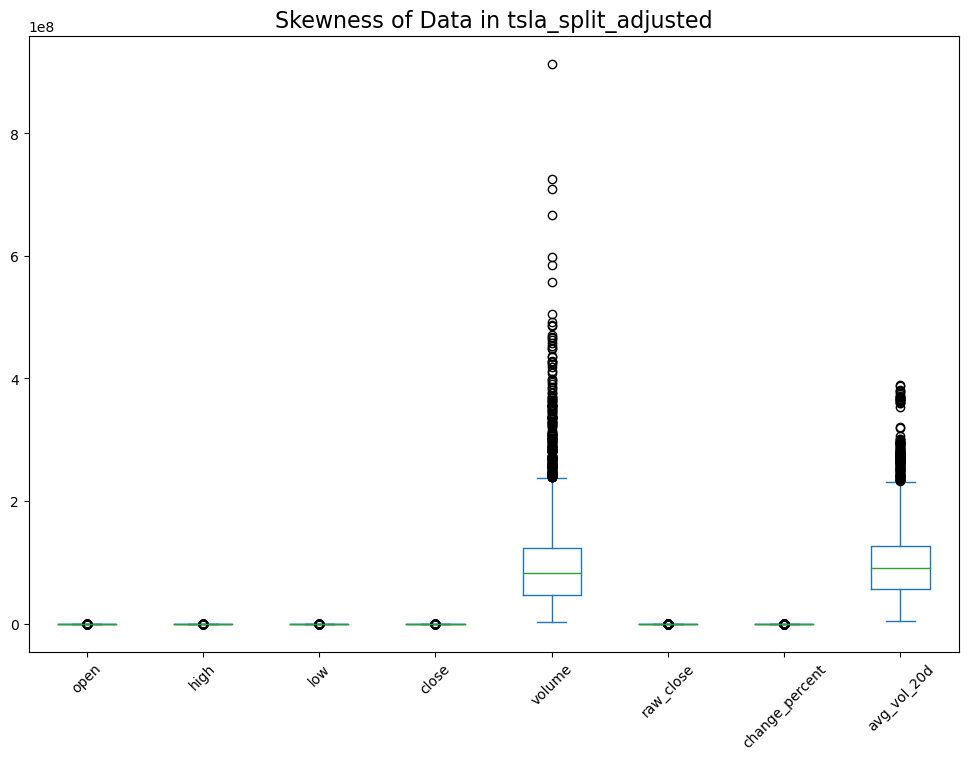

In [86]:
# Function to plot boxplots for numerical columns
def plot_boxplots(data, title):
    data.plot(kind='box', figsize=(12, 8))
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45)
    plt.show()

# Plot boxplots for tsla_split_adjusted
plot_boxplots(tsla_split_adjusted_imputed, "Skewness of Data in tsla_split_adjusted")


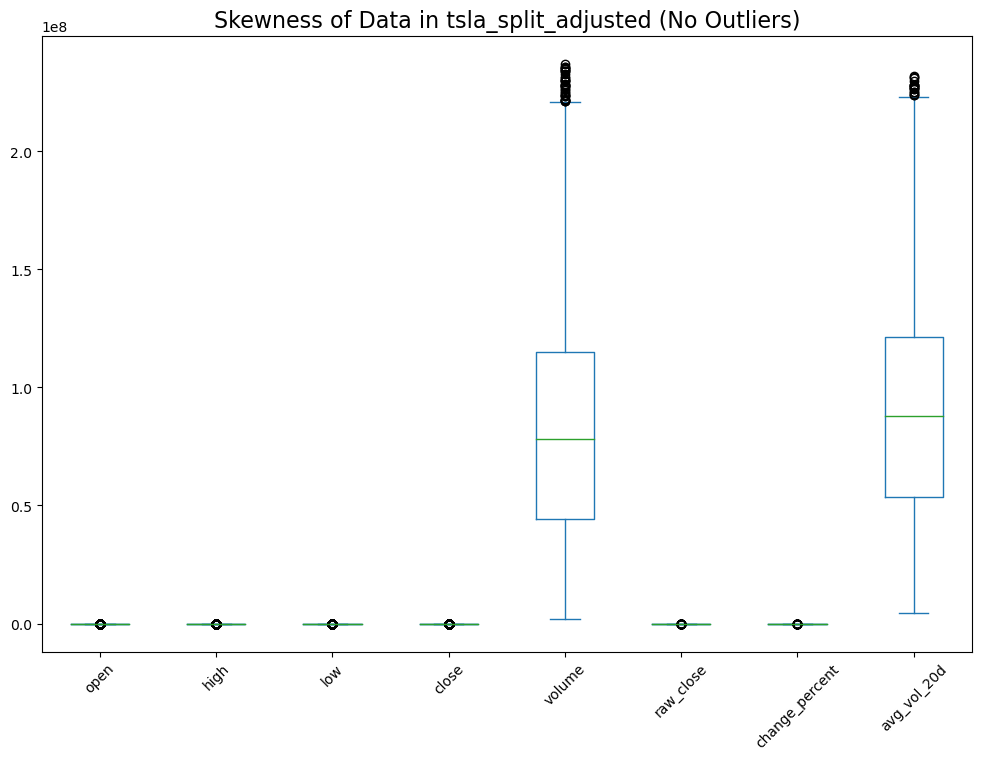

In [87]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(data, threshold=1.5):
    numeric_data = data.select_dtypes(include=['number'])
    Q1 = numeric_data.quantile(0.25)
    Q3 = numeric_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers_removed = numeric_data[(numeric_data >= lower_bound) & (numeric_data <= upper_bound)]
    for column in data.columns:
        if column not in outliers_removed.columns:
            outliers_removed[column] = data[column]
    return outliers_removed

# Remove outliers from tsla_split_adjusted_imputed
tsla_split_adjusted_no_outliers = remove_outliers_iqr(tsla_split_adjusted_imputed)

# Plot boxplots for tsla_split_adjusted_no_outliers
plot_boxplots(tsla_split_adjusted_no_outliers, "Skewness of Data in tsla_split_adjusted (No Outliers)")


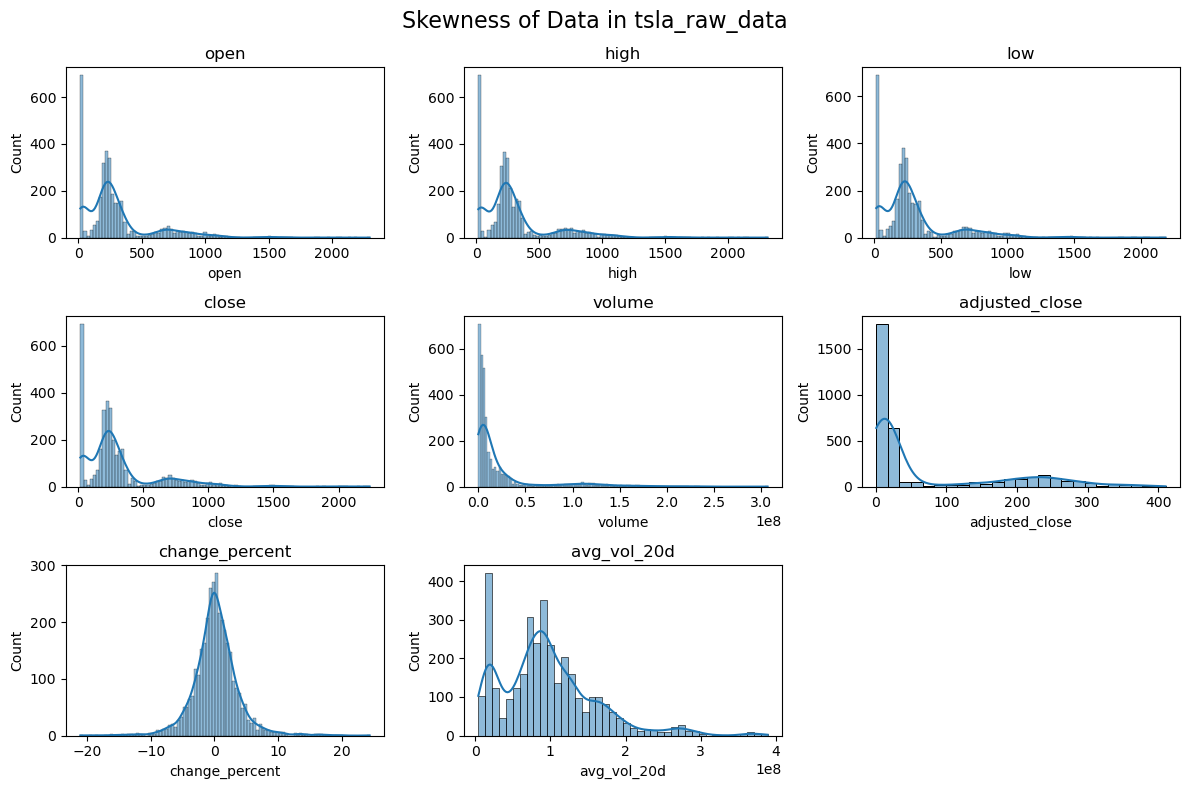

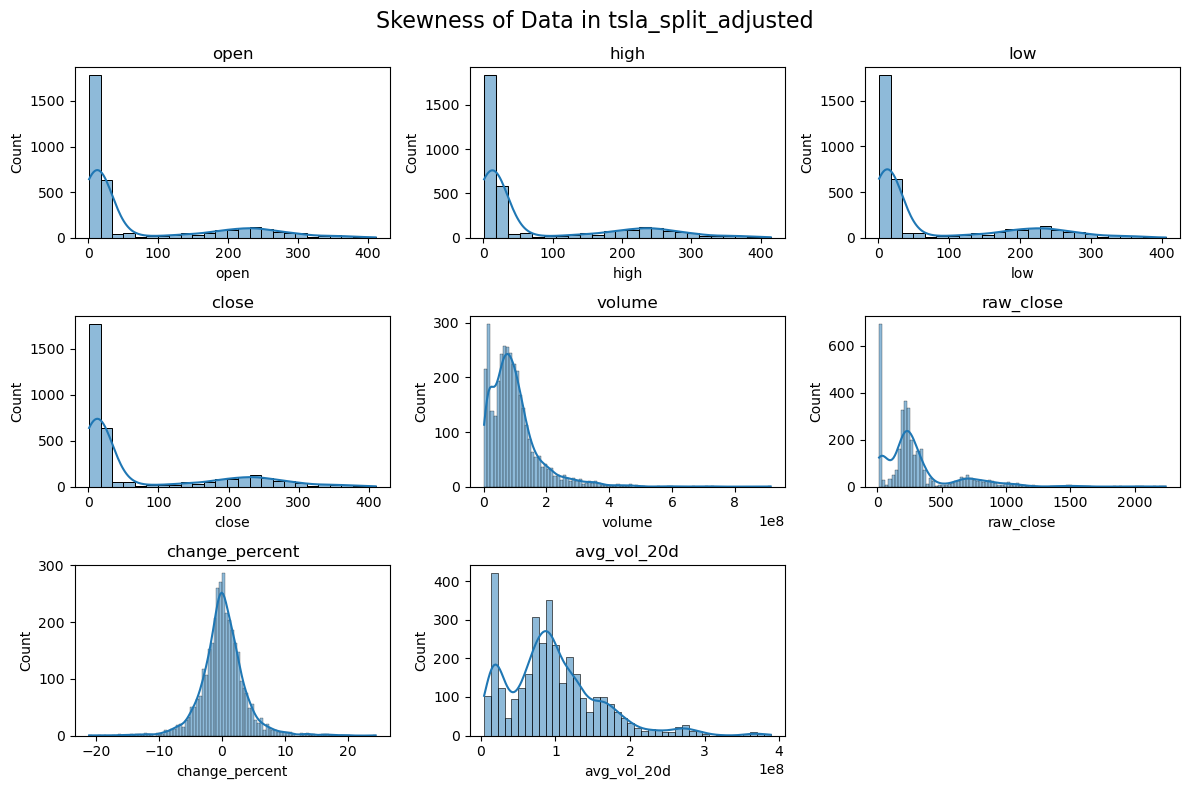

In [88]:
#This code will plot distribution plots for each numerical column in both datasets, showing the skewness of the data. Distribution plots provide a visual representation of the data distribution along with a kernel density estimation (KDE) curve. Positive skewness indicates a right-skewed distribution, while negative skewness indicates a left-skewed distribution.
# Function to plot distribution plots for numerical columns
def plot_distribution(data, title):
    plt.figure(figsize=(12, 8))
    plt.suptitle(title, fontsize=16)
    for i, col in enumerate(data.select_dtypes(include='number').columns):
        plt.subplot(3, 3, i+1)
        sns.histplot(data[col], kde=True)
        plt.title(col)
    plt.tight_layout()
    plt.show()

# Plot distribution plots for tsla_raw_data
plot_distribution(tsla_raw_data_imputed, "Skewness of Data in tsla_raw_data")

# Plot distribution plots for tsla_split_adjusted
plot_distribution(tsla_split_adjusted_imputed, "Skewness of Data in tsla_split_adjusted")


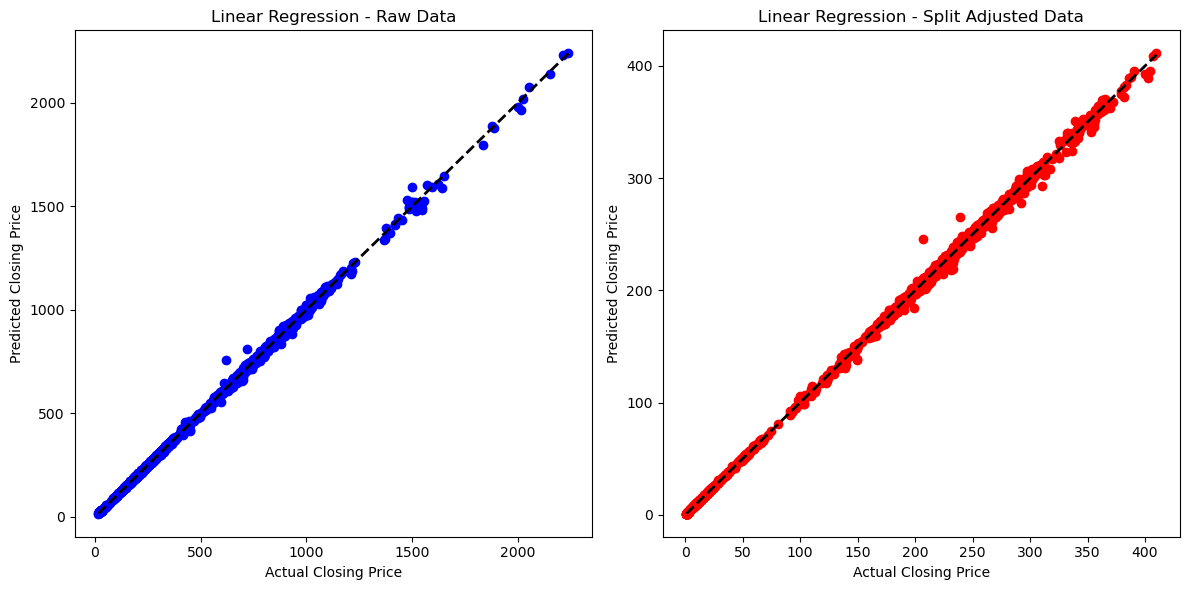

In [89]:
from sklearn.linear_model import LinearRegression
#This code fits a linear regression model to both datasets separately and visualizes the predicted closing prices against the actual closing prices. The scatter plots show how well the model predictions align with the actual closing prices. If the predictions closely follow the diagonal line (the black dashed line), it indicates that the model's predictions are close to the actual values.
# Define the independent variables (features) and dependent variable (target)
X_raw = tsla_raw_data_imputed[['open', 'high', 'low', 'volume']]
y_raw = tsla_raw_data_imputed['close']

X_split = tsla_split_adjusted_imputed[['open', 'high', 'low', 'volume']]
y_split = tsla_split_adjusted_imputed['close']

# Fit the linear regression models
model_raw = LinearRegression().fit(X_raw, y_raw)
model_split = LinearRegression().fit(X_split, y_split)

# Predictions
predictions_raw = model_raw.predict(X_raw)
predictions_split = model_split.predict(X_split)

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_raw, predictions_raw, color='blue')
plt.plot([y_raw.min(), y_raw.max()], [y_raw.min(), y_raw.max()], 'k--', lw=2)
plt.title('Linear Regression - Raw Data')
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')

plt.subplot(1, 2, 2)
plt.scatter(y_split, predictions_split, color='red')
plt.plot([y_split.min(), y_split.max()], [y_split.min(), y_split.max()], 'k--', lw=2)
plt.title('Linear Regression - Split Adjusted Data')
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')

plt.tight_layout()
plt.show()

In [90]:
from scipy.stats import ttest_ind

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(tsla_raw_data_imputed['close'], tsla_split_adjusted_imputed['close'])

# Define significance level
alpha = 0.05

# Print the results
print("Two-sample t-test results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Compare p-value with significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in means.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in means.")


Two-sample t-test results:
T-statistic: 44.73016843097507
P-value: 0.0
Reject the null hypothesis: There is a statistically significant difference in means.


In [91]:

from scipy.stats import f_oneway


# Check if 'date' column is present in tsla_split_adjusted_imputed
if 'date' in tsla_split_adjusted_imputed.columns:
    # Set the 'date' column as the index for tsla_split_adjusted_imputed
    tsla_split_adjusted_imputed.set_index('date', inplace=True)
else:
    print("Error: 'date' column not found in tsla_split_adjusted_imputed DataFrame.")

# Check if 'date' column is present in tsla_raw_data_imputed
if 'date' in tsla_raw_data_imputed.columns:
    # Extract the year from the index for both datasets
    tsla_raw_data_imputed['year'] = pd.to_datetime(tsla_raw_data_imputed['date']).dt.year
    tsla_split_adjusted_imputed['year'] = pd.to_datetime(tsla_split_adjusted_imputed.index).year
else:
    print("Error: 'date' column not found in tsla_raw_data_imputed DataFrame.")

# Perform ANOVA
f_statistic, p_value = f_oneway(tsla_raw_data_imputed['close'], tsla_split_adjusted_imputed['close'])

# Define significance level
alpha = 0.05

# Print the results
print("ANOVA results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Compare p-value with significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in means.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in means.")


ANOVA results:
F-statistic: 2000.7879678633994
P-value: 0.0
Reject the null hypothesis: There is a statistically significant difference in means.


In [92]:
from scipy.stats import chi2_contingency

# You can adjust the categories based on your preference or the characteristics of the data
closing_price_categories = pd.cut(tsla_raw_data_imputed['close'], bins=3, labels=['low', 'medium', 'high'])

# Create a contingency table of observed frequencies
observed_frequencies = pd.crosstab(closing_price_categories, columns='count')

# Perform chi-square goodness-of-fit test
chi2_statistic, p_value, dof, expected_frequencies = chi2_contingency(observed_frequencies)

# Define significance level
alpha = 0.05

# Print the results
print("Chi-square test results:")
print(f"Chi-square statistic: {chi2_statistic}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected_frequencies)

# Compare p-value with significance level
if p_value < alpha:
    print("Reject the null hypothesis: Observed distribution differs significantly from expected distribution.")
else:
    print("Fail to reject the null hypothesis: Observed distribution does not differ significantly from expected distribution.")


Chi-square test results:
Chi-square statistic: 0.0
P-value: 1.0
Degrees of freedom: 0
Expected frequencies:
[[3143.]
 [ 298.]
 [  24.]]
Fail to reject the null hypothesis: Observed distribution does not differ significantly from expected distribution.


In [93]:
from scipy.stats import chisquare
#Goodness-of-fit test:
#We need a categorical variable to perform this test. Let's assume we want to test whether the distribution of the 'change_percent' column differs from a uniform distribution
# Perform Chi-square test for goodness-of-fit
observed_counts = tsla_raw_data_imputed['change_percent'].value_counts()
expected_counts = len(tsla_raw_data_imputed) / len(observed_counts)
chi2, p = chisquare(observed_counts, f_exp=expected_counts)

print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 2078.4666666666667
p-value: 2.279630670988446e-46


In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Test for multicollinearity:
#We'll check the correlation matrix or variance inflation factor (VIF) to identify multicollinearity among the independent variables in the linear regression model.
# Calculate VIF for each independent variable
X = tsla_raw_data_imputed[['open', 'high', 'low', 'volume']]
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF:")
print(vif_data)


VIF:
  Variable          VIF
0     open  2510.798459
1     high  1744.827618
2      low  1691.500115
3   volume     1.196686


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  close   No. Observations:                 3465
Model:                            GLM   Df Residuals:                     3460
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                          47.123
Method:                          IRLS   Log-Likelihood:                -11589.
Date:                Fri, 12 Apr 2024   Deviance:                   1.6304e+05
Time:                        12:39:47   Pearson chi2:                 1.63e+05
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4847      0.184     -2.633      0.0

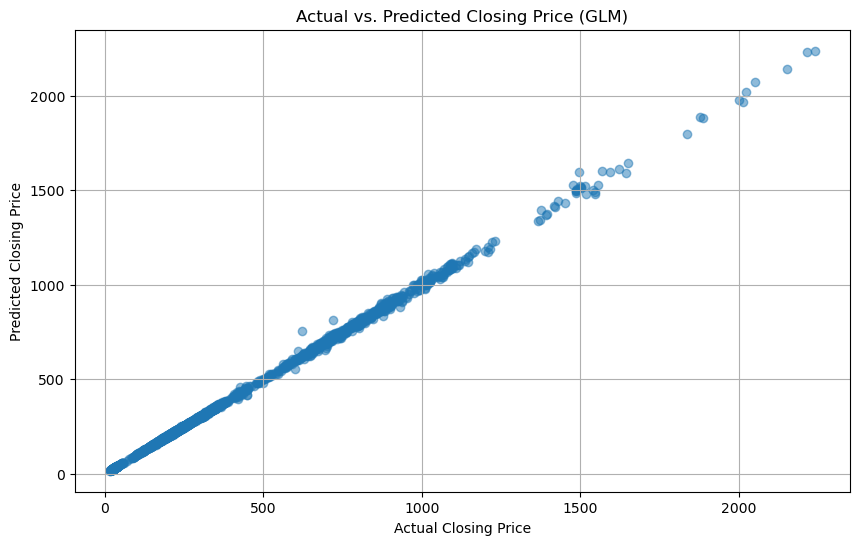

In [95]:
import statsmodels.api as sm

# Define independent variables (features)
X = tsla_raw_data_imputed[['open', 'high', 'low', 'volume']]

# Add a constant term to the independent variables (for the intercept)
X = sm.add_constant(X)

# Define the dependent variable (target)
y = tsla_raw_data_imputed['close']

# Fit a GLM with Gaussian distribution (normal error) and identity link function
glm_model = sm.GLM(y, X, family=sm.families.Gaussian()).fit()

# Print the model summary
print(glm_model.summary())
import matplotlib.pyplot as plt

# Predict the values using the fitted GLM model
predicted_values = glm_model.predict(X)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, predicted_values, alpha=0.5)
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.title('Actual vs. Predicted Closing Price (GLM)')
plt.grid(True)
plt.show()


In [96]:
data = tsla_split_adjusted['close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length, 0]
        label = data[i + seq_length, 0]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

seq_length = 10
n_samples = len(data_scaled)
sequences, labels = create_sequences(data_scaled, seq_length)
split = int(0.8 * len(sequences))
X_train, y_train = sequences[:split], labels[:split]
X_test, y_test = sequences[split:], labels[split:]


In [97]:
#LSTM

In [98]:
from keras import regularizers


In [99]:
# LSTM Model with L2 Regularization
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(seq_length, 1),
               return_sequences=True))
model.add(LSTM(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1))

In [112]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
173/173 [==============================] - 10s 26ms/step - loss: 6.0107e-04 - val_loss: 0.0051
Epoch 2/50
173/173 [==============================] - 4s 22ms/step - loss: 4.9955e-04 - val_loss: 0.0060
Epoch 3/50
173/173 [==============================] - 4s 21ms/step - loss: 5.2537e-04 - val_loss: 0.0055
Epoch 4/50
173/173 [==============================] - 4s 21ms/step - loss: 4.4896e-04 - val_loss: 0.0130
Epoch 5/50
173/173 [==============================] - 4s 22ms/step - loss: 4.5613e-04 - val_loss: 0.0052
Epoch 6/50
173/173 [==============================] - 4s 22ms/step - loss: 5.0776e-04 - val_loss: 0.0067
Epoch 7/50
173/173 [==============================] - 4s 22ms/step - loss: 4.6513e-04 - val_loss: 0.0066
Epoch 8/50
173/173 [==============================] - 4s 22ms/step - loss: 5.8372e-04 - val_loss: 0.0111
Epoch 9/50
173/173 [==============================] - 4s 22ms/step - loss: 4.9951e-04 - val_loss: 0.0058
Epoch 10/50
173/173 [==============================] -

In [113]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)

22/22 [==============================] - 0s 10ms/step - loss: 0.0059


In [114]:
# Make predictions
predictions_lstm_regularized = model.predict(X_test)
predictions_lstm_regularized = scaler.inverse_transform(predictions_lstm_regularized)
y_test_actual_LSTM_regularized = scaler.inverse_transform(y_test.reshape(-1, 1))

22/22 [==============================] - 1s 9ms/step


In [115]:
# Calculate R² and MSE for regularized model
r2_lstm_regularized = r2_score(y_test_actual_LSTM_regularized, predictions_lstm_regularized)
mse_lstm_regularized = mean_squared_error(y_test_actual_LSTM_regularized, predictions_lstm_regularized)

# Print R² and MSE for regularized model
print("R² (Regularized):", r2_lstm_regularized)
print("MSE (Regularized):", mse_lstm_regularized)


R² (Regularized): 0.72181962736661
MSE (Regularized): 965.4998609487267


In [42]:
#RNN

In [43]:
from keras.layers import SimpleRNN


In [44]:
from keras.layers import Dropout

# Define a function to create the RNN model
def create_rnn_model(seq_length, regularization_strength):
    model = Sequential()
    model.add(SimpleRNN(128, activation='relu', kernel_regularizer=regularizers.l2(regularization_strength), input_shape=(seq_length, 1),
                        return_sequences=True))
    model.add(Dropout(0.2))  # Adding dropout for regularization
    model.add(SimpleRNN(64, activation='relu', kernel_regularizer=regularizers.l2(regularization_strength)))
    model.add(Dropout(0.2))  # Adding dropout for regularization
    model.add(Dense(1))
    return model

# Initialize RNN model
model_rnn = create_rnn_model(seq_length, regularization_strength=0.001)

# Compile the model with a lower learning rate
opt = Adam(learning_rate=0.0005)
model_rnn.compile(optimizer=opt, loss='mse')

# Train the model with a larger batch size and more epochs
history_rnn = model_rnn.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss_rnn = model_rnn.evaluate(X_test, y_test)




Epoch 1/100
44/44 [==============================] - 5s 33ms/step - loss: 0.0802 - val_loss: 0.0668
Epoch 2/100
44/44 [==============================] - 1s 18ms/step - loss: 0.0574 - val_loss: 0.0502
Epoch 3/100
44/44 [==============================] - 1s 18ms/step - loss: 0.0418 - val_loss: 0.0395
Epoch 4/100
44/44 [==============================] - 1s 18ms/step - loss: 0.0304 - val_loss: 0.0264
Epoch 5/100
44/44 [==============================] - 1s 19ms/step - loss: 0.0221 - val_loss: 0.0197
Epoch 6/100
44/44 [==============================] - 1s 19ms/step - loss: 0.0161 - val_loss: 0.0161
Epoch 7/100
44/44 [==============================] - 1s 18ms/step - loss: 0.0119 - val_loss: 0.0155
Epoch 8/100
44/44 [==============================] - 1s 19ms/step - loss: 0.0089 - val_loss: 0.0092
Epoch 9/100
44/44 [==============================] - 1s 18ms/step - loss: 0.0067 - val_loss: 0.0069
Epoch 10/100
44/44 [==============================] - 1s 19ms/step - loss: 0.0052 - val_loss: 0.0067

In [45]:

# Make predictions
predictions_rnn_regularized = model_rnn.predict(X_test)
predictions_rnn_regularized = scaler.inverse_transform(predictions_rnn_regularized)
y_test_actual_rnn_regularized = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate R² and MSE for regularized RNN model
r2_rnn_regularized = r2_score(y_test_actual_rnn_regularized, predictions_rnn_regularized)
mse_rnn_regularized = mean_squared_error(y_test_actual_rnn_regularized, predictions_rnn_regularized)

# Print R² and MSE for regularized RNN model
print("R² (Regularized RNN):", r2_rnn_regularized)
print("MSE (Regularized RNN):", mse_rnn_regularized)

22/22 [==============================] - 1s 5ms/step
R² (Regularized RNN): 0.874231837680068
MSE (Regularized RNN): 436.512260308534


In [47]:
#GRU

In [48]:
from keras.layers import GRU

# Define a function to create the GRU model
def create_gru_model(seq_length, regularization_strength):
    model = Sequential()
    model.add(GRU(128, activation='relu', kernel_regularizer=regularizers.l2(regularization_strength), input_shape=(seq_length, 1),
                        return_sequences=True))
    model.add(Dropout(0.2))  # Adding dropout for regularization
    model.add(GRU(64, activation='relu', kernel_regularizer=regularizers.l2(regularization_strength)))
    model.add(Dropout(0.2))  # Adding dropout for regularization
    model.add(Dense(1))
    return model

# Initialize GRU model
model_gru = create_gru_model(seq_length, regularization_strength=0.001)

# Compile the model with a lower learning rate
opt = Adam(learning_rate=0.0005)
model_gru.compile(optimizer=opt, loss='mse')

# Train the model with a larger batch size and more epochs
history_gru = model_gru.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss_gru = model_gru.evaluate(X_test, y_test)


Epoch 1/50
44/44 [==============================] - 8s 55ms/step - loss: 0.1309 - val_loss: 0.1010
Epoch 2/50
44/44 [==============================] - 2s 36ms/step - loss: 0.0769 - val_loss: 0.0595
Epoch 3/50
44/44 [==============================] - 2s 36ms/step - loss: 0.0459 - val_loss: 0.0357
Epoch 4/50
44/44 [==============================] - 2s 35ms/step - loss: 0.0269 - val_loss: 0.0220
Epoch 5/50
44/44 [==============================] - 2s 36ms/step - loss: 0.0156 - val_loss: 0.0150
Epoch 6/50
44/44 [==============================] - 2s 36ms/step - loss: 0.0091 - val_loss: 0.0098
Epoch 7/50
44/44 [==============================] - 2s 36ms/step - loss: 0.0055 - val_loss: 0.0068
Epoch 8/50
44/44 [==============================] - 2s 36ms/step - loss: 0.0034 - val_loss: 0.0045
Epoch 9/50
44/44 [==============================] - 2s 36ms/step - loss: 0.0022 - val_loss: 0.0035
Epoch 10/50
44/44 [==============================] - 2s 36ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 11/

In [49]:

# Make predictions
predictions_gru_regularized = model_gru.predict(X_test)
predictions_gru_regularized = scaler.inverse_transform(predictions_gru_regularized)
y_test_actual_gru_regularized = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate R² and MSE for regularized GRU model
r2_gru_regularized = r2_score(y_test_actual_gru_regularized, predictions_gru_regularized)
mse_gru_regularized = mean_squared_error(y_test_actual_gru_regularized, predictions_gru_regularized)

# Print R² and MSE for regularized GRU model
print("R² (Regularized GRU):", r2_gru_regularized)
print("MSE (Regularized GRU):", mse_gru_regularized)



22/22 [==============================] - 1s 9ms/step
R² (Regularized GRU): 0.8658876742655702
MSE (Regularized GRU): 465.4729254344241


In [ ]:
#ARIMA

In [54]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Convert the index to a DateTimeIndex
tsla_split_adjusted.index = pd.to_datetime(tsla_split_adjusted.index)

# Print the first few rows of the dataset to ensure it has a valid index
print(tsla_split_adjusted.head())

# Convert the 'close' column to a time series
tsla_time_series = tsla_split_adjusted['close']

# Define ARIMA model
order = (5, 1, 0)  # Example order, you may need to tune this
model_arima = ARIMA(tsla_time_series, order=order)

# Compile ARIMA model
model_arima_fit = model_arima.fit()

# Number of periods to forecast into the future
forecast_periods = 30

# Make predictions
start_index = len(tsla_time_series)
end_index = start_index + forecast_periods - 1
predictions_arima = model_arima_fit.predict(start=start_index, end=end_index, typ='levels')

# Print predictions
print(predictions_arima)


               open     high      low    close     volume  raw_close  \
date                                                                   
2010-06-29  1.26666  1.66666  1.16934  1.59266  281749173    23.8899   
2010-06-30  1.71934  2.02794  1.55334  1.58866  257915884    23.8299   
2010-07-01  1.66666  1.72800  1.35134  1.46400  123447940    21.9600   
2010-07-02  1.53334  1.54000  1.24734  1.28000   77127102    19.2000   
2010-07-06  1.33334  1.33334  1.05534  1.07400  103189435    16.1100   

            change_percent   avg_vol_20d  year  
date                                            
2010-06-29        0.198704  9.696373e+07  2010  
2010-06-30       -0.250000  9.696373e+07  2010  
2010-07-01       -7.850000  9.696373e+07  2010  
2010-07-02      -12.570000  9.696373e+07  2010  
2010-07-06      -16.090000  9.696373e+07  2010  
3465    171.155730
3466    170.657859
3467    170.898120
3468    171.022762
3469    170.983035
3470    170.952569
3471    170.974771
3472    170.977766


In [61]:
# Calculate validation metrics
mse = mean_squared_error(tsla_time_series[-forecast_periods:], predictions_arima)
rmse = np.sqrt(mse)

# Calculate MAPE, handling cases where denominator might be zero or missing values
actual = tsla_time_series[-forecast_periods:]
predicted = predictions_arima[~np.isnan(predictions_arima)]

# Print validation results
print("Validation Results:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


Validation Results:
MSE: 221.57
RMSE: 14.89
